## Grouping -- SPLIT-APPLY-COMBINE principals

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will work with `gapminder` again.

In [2]:
gap_url = 'https://raw.githubusercontent.com/chendaniely/pandas_for_everyone/master/data/gapminder.tsv'

In [3]:
gap_df = pd.read_csv(gap_url, sep='\t')

In [4]:
gap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


We visualized summary statistics associated with `lifeExp` per year, across 142 countries.

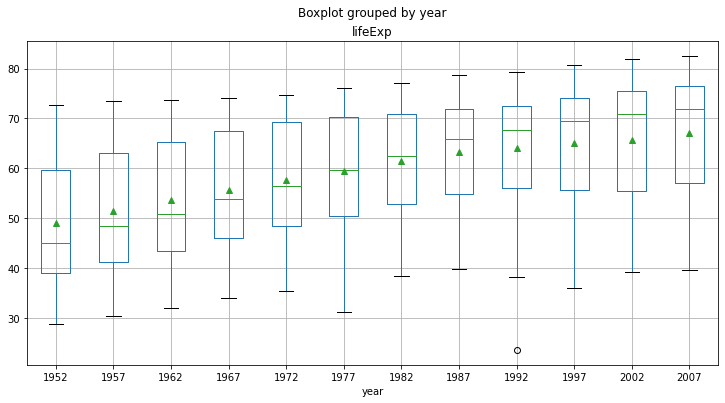

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

gap_df.boxplot(ax=ax, column=['lifeExp'], showmeans=True, by='year')

plt.show()

### How are those quantities calculated?

How are the data grouped? How are the statistics calculated per group?

To group, we actually need to **SPLIT** the data into separate groups.

In [6]:
### split by year

gap_1952 = gap_df.loc[ gap_df['year'] == 1952 ]

In [7]:
gap_1952.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 1692
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    142 non-null    object 
 1   continent  142 non-null    object 
 2   year       142 non-null    int64  
 3   lifeExp    142 non-null    float64
 4   pop        142 non-null    int64  
 5   gdpPercap  142 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 7.8+ KB


In [8]:
gap_1952['year'].value_counts()

1952    142
Name: year, dtype: int64

In [9]:
gap_1957 = gap_df.loc[ gap_df['year'] == 1957 ]

gap_1962 = gap_df.loc[ gap_df['year'] == 1962 ]

We can now calculate the `.mean()` per data set for `lifeExp`.

**APPLY** the functions of choice to each group.

In [10]:
### APPLY the `.mean()` method to each data set

gap_1952['lifeExp'].mean()

49.05761971830987

In [12]:
gap_1957['lifeExp'].mean()

51.50740112676054

In [13]:
gap_1962['lifeExp'].mean()

53.60924901408449

**COMBINE** the summary statistics from the separate groups back into a single data set.

In [14]:
gap_lifeExp_year = pd.DataFrame({'year': [1952, 1957, 1962],
                                'lifeExp': [gap_1952['lifeExp'].mean(),
                                           gap_1957['lifeExp'].mean(),
                                           gap_1962['lifeExp'].mean()]})

In [15]:
gap_lifeExp_year

,year,lifeExp
0,1952,49.057620
1,1957,51.507401
2,1962,53.609249


Pandas performs all three actions through the `.groupby()` method.

Calculate the mean `lifeExp` per year in one line of code -- perform the SPLIT-APPLY-COMBINE operations at once.

In [16]:
gap_df.groupby('year').lifeExp.mean() ### DOT NOTATION

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

Alternatively, we can use the bracket notation.

In [17]:
gap_df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

How can we calculate the boxplot stats from the figure?

In [18]:
gap_df.groupby('year').lifeExp.describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1952,142.0,49.057620,12.225956,28.801,39.05900,45.1355,59.76500,72.670
1957,142.0,51.507401,12.231286,30.332,41.24750,48.3605,63.03675,73.470
1962,142.0,53.609249,12.097245,31.997,43.46850,50.8810,65.23450,73.680
1967,142.0,55.678290,11.718858,34.020,46.03375,53.8250,67.41950,74.160
1972,142.0,57.647386,11.381953,35.400,48.50025,56.5300,69.24750,74.720
1977,142.0,59.570157,11.227229,31.220,50.47550,59.6720,70.38250,76.110
1982,142.0,61.533197,10.770618,38.445,52.94000,62.4415,70.92125,77.110
1987,142.0,63.212613,10.556285,39.906,54.94075,65.8340,71.87725,78.670
1992,142.0,64.160338,11.227380,23.599,56.12175,67.7030,72.58250,79.360


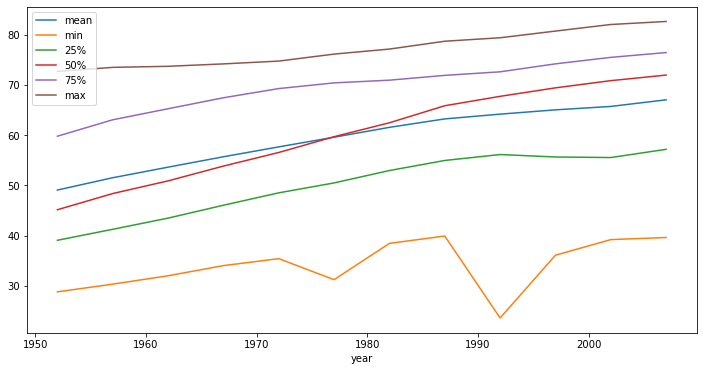

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))

gap_df.groupby('year').lifeExp.describe().drop(['count', 'std'], axis=1).plot(ax=ax)

plt.show()

We can perform the same operations with the bracket notation.

In [21]:
gap_df.groupby('year')['lifeExp'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1952,142.0,49.057620,12.225956,28.801,39.05900,45.1355,59.76500,72.670
1957,142.0,51.507401,12.231286,30.332,41.24750,48.3605,63.03675,73.470
1962,142.0,53.609249,12.097245,31.997,43.46850,50.8810,65.23450,73.680
1967,142.0,55.678290,11.718858,34.020,46.03375,53.8250,67.41950,74.160
1972,142.0,57.647386,11.381953,35.400,48.50025,56.5300,69.24750,74.720
1977,142.0,59.570157,11.227229,31.220,50.47550,59.6720,70.38250,76.110
1982,142.0,61.533197,10.770618,38.445,52.94000,62.4415,70.92125,77.110
1987,142.0,63.212613,10.556285,39.906,54.94075,65.8340,71.87725,78.670
1992,142.0,64.160338,11.227380,23.599,56.12175,67.7030,72.58250,79.360


In [22]:
my_variable_to_use = 'lifeExp'

gap_df.groupby('year')[my_variable_to_use].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1952,142.0,49.057620,12.225956,28.801,39.05900,45.1355,59.76500,72.670
1957,142.0,51.507401,12.231286,30.332,41.24750,48.3605,63.03675,73.470
1962,142.0,53.609249,12.097245,31.997,43.46850,50.8810,65.23450,73.680
1967,142.0,55.678290,11.718858,34.020,46.03375,53.8250,67.41950,74.160
1972,142.0,57.647386,11.381953,35.400,48.50025,56.5300,69.24750,74.720
1977,142.0,59.570157,11.227229,31.220,50.47550,59.6720,70.38250,76.110
1982,142.0,61.533197,10.770618,38.445,52.94000,62.4415,70.92125,77.110
1987,142.0,63.212613,10.556285,39.906,54.94075,65.8340,71.87725,78.670
1992,142.0,64.160338,11.227380,23.599,56.12175,67.7030,72.58250,79.360


We can describe the DataFrame all together.

In [23]:
gap_df.groupby('year').describe()

lifeExp                                                             \
       count       mean        std     min       25%      50%       75%   
year                                                                      
1952   142.0  49.057620  12.225956  28.801  39.05900  45.1355  59.76500   
1957   142.0  51.507401  12.231286  30.332  41.24750  48.3605  63.03675   
1962   142.0  53.609249  12.097245  31.997  43.46850  50.8810  65.23450   
1967   142.0  55.678290  11.718858  34.020  46.03375  53.8250  67.41950   
1972   142.0  57.647386  11.381953  35.400  48.50025  56.5300  69.24750   
1977   142.0  59.570157  11.227229  31.220  50.47550  59.6720  70.38250   
1982   142.0  61.533197  10.770618  38.445  52.94000  62.4415  70.92125   
1987   142.0  63.212613  10.556285  39.906  54.94075  65.8340  71.87725   
1992   142.0  64.160338  11.227380  23.599  56.12175  67.7030  72.58250   
1997   142.0  65.014676  11.559439  36.087  55.63375  69.3940  74.16975   
2002   142.0  65.694923  12.279823  39.193  55.52225  70.8255  75.45925   
2007   142.0  67.007423  12.073021  39.613  57.16025  71.9355  76.41325   

                pop                ...                            gdpPercap  \
         max  count          mean  ...          75%           max     count   
year                               ...                                        
1952  72.670  142.0  1.695040e+07  ...   9168197.75  5.562635e+08     142.0   
1957  73.470  142.0  1.876341e+07  ...   9817598.00  6.374080e+08     142.0   
1962  73.680  142.0  2.042101e+07  ...  10980084.50  6.657700e+08     142.0   
1967  74.160  142.0  2.265830e+07  ...  12614584.75  7.545500e+08     142.0   
1972  74.720  142.0  2.518998e+07  ...  14679199.50  8.620300e+08     142.0   
1977  76.110  142.0  2.767638e+07  ...  16670227.00  9.434550e+08     142.0   
1982  77.110  142.0  3.020730e+07  ...  18407324.75  1.000281e+09     142.0   
1987  78.670  142.0  3.303857e+07  ...  20947542.50  1.084035e+09     142.0   
1992  79.360  142.0  3.599092e+07  ...  22705382.50  1.164970e+09     142.0   
1997  80.690  142.0  3.883947e+07  ...  24311369.75  1.230075e+09     142.0   
2002  82.000  142.0  4.145759e+07  ...  26545556.25  1.280400e+09     142.0   
2007  82.603  142.0  4.402122e+07  ...  31210041.75  1.318683e+09     142.0   

                                                                        \
              mean           std         min          25%          50%   
year                                                                     
1952   3725.276046   9321.064786  298.846212   864.752389  1968.528344   
1957   4299.408345   9869.662202  335.997115   930.540819  2173.220291   
1962   4725.812342   8667.362525  355.203227  1059.149171  2335.439533   
1967   5483.653047   8095.315431  349.000000  1151.245103  2678.334741   
1972   6770.082815  10614.383403  357.000000  1257.193853  3339.129407   
1977   7313.166421   8362.489150  371.000000  1357.257252  3798.609244   
1982   7518.901673   7733.845006  424.000000  1363.338985  4216.228428   
1987   7900.920218   8288.281304  385.000000  1327.469823  4280.300366   
1992   8158.608521   9031.846080  347.000000  1270.660958  4386.085502   
1997   9090.175363  10171.493263  312.188423  1366.837958  4781.825478   
2002   9917.848365  11154.114865  241.165877  1409.567264  5319.804524   
2007  11680.071820  12859.937337  277.551859  1624.842248  6124.371109   

                                  
               75%           max  
year                              
1952   3913.492777  108382.35290  
1957   4876.356362  113523.13290  
1962   5709.381428   95458.11176  
1967   7075.932943   80894.88326  
1972   9508.839303  109347.86700  
1977  11204.102423   59265.47714  
1982  12347.953723   33693.17525  
1987  11994.052795   31540.97480  
1992  10684.351870   34932.91959  
1997  12022.867188   41283.16433  
2002  13359.512257   44683.97525  
2007  18008.835640   49357.19017  

[12 rows x 24 columns]

Just focus on the `.mean()`.

In [24]:
gap_df.groupby('year').mean()

,lifeExp,pop,gdpPercap
year,,,
1952,49.057620,1.695040e+07,3725.276046
1957,51.507401,1.876341e+07,4299.408345
1962,53.609249,2.042101e+07,4725.812342
1967,55.678290,2.265830e+07,5483.653047
1972,57.647386,2.518998e+07,6770.082815
1977,59.570157,2.767638e+07,7313.166421
1982,61.533197,3.020730e+07,7518.901673
1987,63.212613,3.303857e+07,7900.920218
1992,64.160338,3.599092e+07,8158.608521


## Apply custom functions

Define our own functions and apply to each group.

Calculate the IQR - the Interquartile Range. The IQR is the difference between the 75th quantile and the 25th quantile. 

In [25]:
def my_iqr(values):
    """calculate the interquartile range (IQR)"""
    q25 = np.percentile(values, q=25)
    q75 = np.percentile(values, q=75)
    
    return q75 - q25

We need to use the `.aggregate()` or `.agg()` method to apply our own functions.

In [26]:
gap_df.groupby('year')['lifeExp'].aggregate(my_iqr)

year
1952    20.70600
1957    21.78925
1962    21.76600
1967    21.38575
1972    20.74725
1977    19.90700
1982    17.98125
1987    16.93650
1992    16.46075
1997    18.53600
2002    19.93700
2007    19.25300
Name: lifeExp, dtype: float64

Double check our work and practice adding columns to DataFrames.

In [27]:
gap_year_summary = gap_df.groupby('year')['lifeExp'].describe()

In [28]:
gap_year_summary

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1952,142.0,49.057620,12.225956,28.801,39.05900,45.1355,59.76500,72.670
1957,142.0,51.507401,12.231286,30.332,41.24750,48.3605,63.03675,73.470
1962,142.0,53.609249,12.097245,31.997,43.46850,50.8810,65.23450,73.680
1967,142.0,55.678290,11.718858,34.020,46.03375,53.8250,67.41950,74.160
1972,142.0,57.647386,11.381953,35.400,48.50025,56.5300,69.24750,74.720
1977,142.0,59.570157,11.227229,31.220,50.47550,59.6720,70.38250,76.110
1982,142.0,61.533197,10.770618,38.445,52.94000,62.4415,70.92125,77.110
1987,142.0,63.212613,10.556285,39.906,54.94075,65.8340,71.87725,78.670
1992,142.0,64.160338,11.227380,23.599,56.12175,67.7030,72.58250,79.360


In [29]:
gap_year_summary['iqr'] = gap_year_summary['75%'] - gap_year_summary['25%']

In [30]:
gap_year_summary

,count,mean,std,min,25%,50%,75%,max,iqr
year,,,,,,,,,
1952,142.0,49.057620,12.225956,28.801,39.05900,45.1355,59.76500,72.670,20.70600
1957,142.0,51.507401,12.231286,30.332,41.24750,48.3605,63.03675,73.470,21.78925
1962,142.0,53.609249,12.097245,31.997,43.46850,50.8810,65.23450,73.680,21.76600
1967,142.0,55.678290,11.718858,34.020,46.03375,53.8250,67.41950,74.160,21.38575
1972,142.0,57.647386,11.381953,35.400,48.50025,56.5300,69.24750,74.720,20.74725
1977,142.0,59.570157,11.227229,31.220,50.47550,59.6720,70.38250,76.110,19.90700
1982,142.0,61.533197,10.770618,38.445,52.94000,62.4415,70.92125,77.110,17.98125
1987,142.0,63.212613,10.556285,39.906,54.94075,65.8340,71.87725,78.670,16.93650
1992,142.0,64.160338,11.227380,23.599,56.12175,67.7030,72.58250,79.360,16.46075


In [31]:
gap_df.groupby('year')['lifeExp'].aggregate(my_iqr)

year
1952    20.70600
1957    21.78925
1962    21.76600
1967    21.38575
1972    20.74725
1977    19.90700
1982    17.98125
1987    16.93650
1992    16.46075
1997    18.53600
2002    19.93700
2007    19.25300
Name: lifeExp, dtype: float64

### Standard error on the mean

Calculate the standard error on the mean with the `.sem()` method.

In [32]:
gap_df.groupby('year')['lifeExp'].sem()

year
1952    1.025979
1957    1.026427
1962    1.015178
1967    0.983425
1972    0.955152
1977    0.942168
1982    0.903850
1987    0.885864
1992    0.942181
1997    0.970047
2002    1.030500
2007    1.013145
Name: lifeExp, dtype: float64

Double check, since we know the formula for the standard error on the mean.

In [33]:
gap_year_summary['se_mean'] = gap_year_summary['std'] / np.sqrt( gap_year_summary['count'] )

In [34]:
gap_year_summary

,count,mean,std,min,25%,50%,75%,max,iqr,se_mean
year,,,,,,,,,,
1952,142.0,49.057620,12.225956,28.801,39.05900,45.1355,59.76500,72.670,20.70600,1.025979
1957,142.0,51.507401,12.231286,30.332,41.24750,48.3605,63.03675,73.470,21.78925,1.026427
1962,142.0,53.609249,12.097245,31.997,43.46850,50.8810,65.23450,73.680,21.76600,1.015178
1967,142.0,55.678290,11.718858,34.020,46.03375,53.8250,67.41950,74.160,21.38575,0.983425
1972,142.0,57.647386,11.381953,35.400,48.50025,56.5300,69.24750,74.720,20.74725,0.955152
1977,142.0,59.570157,11.227229,31.220,50.47550,59.6720,70.38250,76.110,19.90700,0.942168
1982,142.0,61.533197,10.770618,38.445,52.94000,62.4415,70.92125,77.110,17.98125,0.903850
1987,142.0,63.212613,10.556285,39.906,54.94075,65.8340,71.87725,78.670,16.93650,0.885864
1992,142.0,64.160338,11.227380,23.599,56.12175,67.7030,72.58250,79.360,16.46075,0.942181


In [35]:
gap_df.groupby('year')['lifeExp'].sem()

year
1952    1.025979
1957    1.026427
1962    1.015178
1967    0.983425
1972    0.955152
1977    0.942168
1982    0.903850
1987    0.885864
1992    0.942181
1997    0.970047
2002    1.030500
2007    1.013145
Name: lifeExp, dtype: float64

### The `.aggregate()` method to apply multiple functions

Pass in a list of function handles or strings of the function names to apply.

In [36]:
gap_df.groupby('year')['lifeExp'].aggregate([ 'mean', 'sem' ])

,mean,sem
year,,
1952,49.057620,1.025979
1957,51.507401,1.026427
1962,53.609249,1.015178
1967,55.678290,0.983425
1972,57.647386,0.955152
1977,59.570157,0.942168
1982,61.533197,0.903850
1987,63.212613,0.885864
1992,64.160338,0.942181


In [37]:
gap_df.groupby('year')['lifeExp'].aggregate([np.mean, np.min, np.max, 'sem'])

,mean,amin,amax,sem
year,,,,
1952,49.057620,28.801,72.670,1.025979
1957,51.507401,30.332,73.470,1.026427
1962,53.609249,31.997,73.680,1.015178
1967,55.678290,34.020,74.160,0.983425
1972,57.647386,35.400,74.720,0.955152
1977,59.570157,31.220,76.110,0.942168
1982,61.533197,38.445,77.110,0.903850
1987,63.212613,39.906,78.670,0.885864
1992,64.160338,23.599,79.360,0.942181


In [38]:
gap_df.groupby('year')['lifeExp'].aggregate([np.mean, np.min, np.max, my_iqr, 'sem'])

,mean,amin,amax,my_iqr,sem
year,,,,,
1952,49.057620,28.801,72.670,20.70600,1.025979
1957,51.507401,30.332,73.470,21.78925,1.026427
1962,53.609249,31.997,73.680,21.76600,1.015178
1967,55.678290,34.020,74.160,21.38575,0.983425
1972,57.647386,35.400,74.720,20.74725,0.955152
1977,59.570157,31.220,76.110,19.90700,0.942168
1982,61.533197,38.445,77.110,17.98125,0.903850
1987,63.212613,39.906,78.670,16.93650,0.885864
1992,64.160338,23.599,79.360,16.46075,0.942181


In [39]:
gap_year_lifeExp_summary = gap_df.groupby('year')['lifeExp'].aggregate(['mean', 'min', 'max', 'sem'])

In [40]:
gap_year_lifeExp_summary

,mean,min,max,sem
year,,,,
1952,49.057620,28.801,72.670,1.025979
1957,51.507401,30.332,73.470,1.026427
1962,53.609249,31.997,73.680,1.015178
1967,55.678290,34.020,74.160,0.983425
1972,57.647386,35.400,74.720,0.955152
1977,59.570157,31.220,76.110,0.942168
1982,61.533197,38.445,77.110,0.903850
1987,63.212613,39.906,78.670,0.885864
1992,64.160338,23.599,79.360,0.942181


In [41]:
gap_year_lifeExp_summary['mean_lwr'] = gap_year_lifeExp_summary['mean'] - 2 * gap_year_lifeExp_summary['sem']
gap_year_lifeExp_summary['mean_upr'] = gap_year_lifeExp_summary['mean'] + 2 * gap_year_lifeExp_summary['sem']

In [42]:
gap_year_lifeExp_summary

,mean,min,max,sem,mean_lwr,mean_upr
year,,,,,,
1952,49.057620,28.801,72.670,1.025979,47.005661,51.109579
1957,51.507401,30.332,73.470,1.026427,49.454548,53.560255
1962,53.609249,31.997,73.680,1.015178,51.578893,55.639606
1967,55.678290,34.020,74.160,0.983425,53.711440,57.645139
1972,57.647386,35.400,74.720,0.955152,55.737082,59.557691
1977,59.570157,31.220,76.110,0.942168,57.685821,61.454494
1982,61.533197,38.445,77.110,0.903850,59.725497,63.340898
1987,63.212613,39.906,78.670,0.885864,61.440885,64.984340
1992,64.160338,23.599,79.360,0.942181,62.275977,66.044700


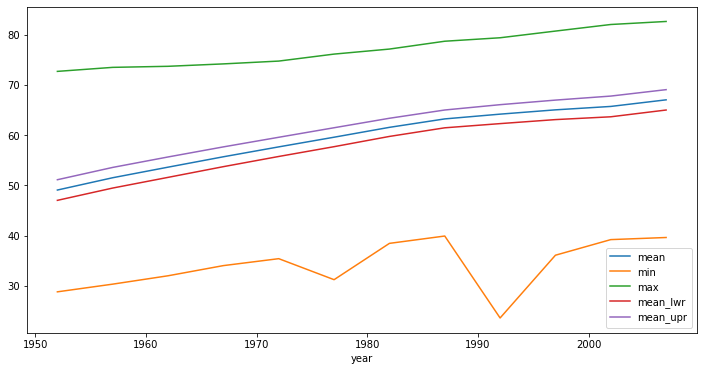

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))

gap_year_lifeExp_summary.drop(['sem'], axis=1).plot(ax=ax)

plt.show()

In [44]:
gap_df.groupby('year')['lifeExp'].\
aggregate(['mean', 'min', 'max', 'sem']).\
rename(columns={'mean': 'avg_years', 
               'min': 'min_years',
               'max': 'max_years',
               'sem': 'se_mean'})

,avg_years,min_years,max_years,se_mean
year,,,,
1952,49.057620,28.801,72.670,1.025979
1957,51.507401,30.332,73.470,1.026427
1962,53.609249,31.997,73.680,1.015178
1967,55.678290,34.020,74.160,0.983425
1972,57.647386,35.400,74.720,0.955152
1977,59.570157,31.220,76.110,0.942168
1982,61.533197,38.445,77.110,0.903850
1987,63.212613,39.906,78.670,0.885864
1992,64.160338,23.599,79.360,0.942181


In [45]:
gap_df.groupby('year')['lifeExp'].\
aggregate(['mean', 'min', 'max', 'sem']).\
rename(columns={'mean': 'avg_years', 
               'min': 'min_years',
               'max': 'max_years',
               'sem': 'se_mean'}).shape

(12, 4)

I don't like the index. So I typically use `.reset_index()` and the index becomes a column in the DataFrame.

In [46]:
gap_df.groupby('year')['lifeExp'].\
aggregate(['mean', 'min', 'max', 'sem']).\
rename(columns={'mean': 'avg_years', 
               'min': 'min_years',
               'max': 'max_years',
               'sem': 'se_mean'}).\
reset_index()

,year,avg_years,min_years,max_years,se_mean
0,1952,49.057620,28.801,72.670,1.025979
1,1957,51.507401,30.332,73.470,1.026427
2,1962,53.609249,31.997,73.680,1.015178
3,1967,55.678290,34.020,74.160,0.983425
4,1972,57.647386,35.400,74.720,0.955152
5,1977,59.570157,31.220,76.110,0.942168
6,1982,61.533197,38.445,77.110,0.903850
7,1987,63.212613,39.906,78.670,0.885864
8,1992,64.160338,23.599,79.360,0.942181
9,1997,65.014676,36.087,80.690,0.970047


## What's going on with the `.groupby()` call?

In [47]:
just_group_year = gap_df.groupby('year')

In [48]:
print( type( just_group_year ) )

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [49]:
print( type( gap_df ) )

<class 'pandas.core.frame.DataFrame'>


In [50]:
just_group_year.groups

{1952: Int64Index([   0,   12,   24,   36,   48,   60,   72,   84,   96,  108,
             ...
             1584, 1596, 1608, 1620, 1632, 1644, 1656, 1668, 1680, 1692],
            dtype='int64', length=142),
 1957: Int64Index([   1,   13,   25,   37,   49,   61,   73,   85,   97,  109,
             ...
             1585, 1597, 1609, 1621, 1633, 1645, 1657, 1669, 1681, 1693],
            dtype='int64', length=142),
 1962: Int64Index([   2,   14,   26,   38,   50,   62,   74,   86,   98,  110,
             ...
             1586, 1598, 1610, 1622, 1634, 1646, 1658, 1670, 1682, 1694],
            dtype='int64', length=142),
 1967: Int64Index([   3,   15,   27,   39,   51,   63,   75,   87,   99,  111,
             ...
             1587, 1599, 1611, 1623, 1635, 1647, 1659, 1671, 1683, 1695],
            dtype='int64', length=142),
 1972: Int64Index([   4,   16,   28,   40,   52,   64,   76,   88,  100,  112,
             ...
             1588, 1600, 1612, 1624, 1636, 1648, 1660, 1672, 168

In [51]:
gap_df.head(14)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [52]:
gap_df.loc[ gap_df['year'] == 1952 ]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
12,Albania,Europe,1952,55.230,1282697,1601.056136
24,Algeria,Africa,1952,43.077,9279525,2449.008185
36,Angola,Africa,1952,30.015,4232095,3520.610273
48,Argentina,Americas,1952,62.485,17876956,5911.315053
...,...,...,...,...,...,...
1644,Vietnam,Asia,1952,40.412,26246839,605.066492
1656,West Bank and Gaza,Asia,1952,43.160,1030585,1515.592329
1668,"Yemen, Rep.",Asia,1952,32.548,4963829,781.717576
1680,Zambia,Africa,1952,42.038,2672000,1147.388831


The total number of elements or SIZE of each group:

In [53]:
just_group_year.size()

year
1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
dtype: int64

Select a group from the grouped object we use the `.get_group()` method.

In [54]:
just_group_year.get_group(1952)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
12,Albania,Europe,1952,55.230,1282697,1601.056136
24,Algeria,Africa,1952,43.077,9279525,2449.008185
36,Angola,Africa,1952,30.015,4232095,3520.610273
48,Argentina,Americas,1952,62.485,17876956,5911.315053
...,...,...,...,...,...,...
1644,Vietnam,Asia,1952,40.412,26246839,605.066492
1656,West Bank and Gaza,Asia,1952,43.160,1030585,1515.592329
1668,"Yemen, Rep.",Asia,1952,32.548,4963829,781.717576
1680,Zambia,Africa,1952,42.038,2672000,1147.388831


## Group by multiple columns

In [55]:
gap_df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

To groupby multiple columns we need to pass in a list, `[]`, of variable names to the `.groupby()` method.

In [56]:
gap_df.groupby(['year', 'continent']).size()

year  continent
1952  Africa       52
      Americas     25
      Asia         33
      Europe       30
      Oceania       2
1957  Africa       52
      Americas     25
      Asia         33
      Europe       30
      Oceania       2
1962  Africa       52
      Americas     25
      Asia         33
      Europe       30
      Oceania       2
1967  Africa       52
      Americas     25
      Asia         33
      Europe       30
      Oceania       2
1972  Africa       52
      Americas     25
      Asia         33
      Europe       30
      Oceania       2
1977  Africa       52
      Americas     25
      Asia         33
      Europe       30
      Oceania       2
1982  Africa       52
      Americas     25
      Asia         33
      Europe       30
      Oceania       2
1987  Africa       52
      Americas     25
      Asia         33
      Europe       30
      Oceania       2
1992  Africa       52
      Americas     25
      Asia         33
      Europe       30
      Oceania   

What is the data type of the result?

In [58]:
print( type(gap_df.groupby(['year', 'continent']).size() ) )

<class 'pandas.core.series.Series'>


The grouping by multiple variables has created a **multi-index**.

In [59]:
gap_df.groupby(['year', 'continent']).size().index

MultiIndex([(1952,   'Africa'),
            (1952, 'Americas'),
            (1952,     'Asia'),
            (1952,   'Europe'),
            (1952,  'Oceania'),
            (1957,   'Africa'),
            (1957, 'Americas'),
            (1957,     'Asia'),
            (1957,   'Europe'),
            (1957,  'Oceania'),
            (1962,   'Africa'),
            (1962, 'Americas'),
            (1962,     'Asia'),
            (1962,   'Europe'),
            (1962,  'Oceania'),
            (1967,   'Africa'),
            (1967, 'Americas'),
            (1967,     'Asia'),
            (1967,   'Europe'),
            (1967,  'Oceania'),
            (1972,   'Africa'),
            (1972, 'Americas'),
            (1972,     'Asia'),
            (1972,   'Europe'),
            (1972,  'Oceania'),
            (1977,   'Africa'),
            (1977, 'Americas'),
            (1977,     'Asia'),
            (1977,   'Europe'),
            (1977,  'Oceania'),
            (1982,   'Africa'),
        

We can apply functions to each of the groups and summarize just like before.

The mean `lifeExp` per year per continent.

In [61]:
gap_df.groupby(['year', 'continent'])['lifeExp'].mean()

year  continent
1952  Africa       39.135500
      Americas     53.279840
      Asia         46.314394
      Europe       64.408500
      Oceania      69.255000
1957  Africa       41.266346
      Americas     55.960280
      Asia         49.318544
      Europe       66.703067
      Oceania      70.295000
1962  Africa       43.319442
      Americas     58.398760
      Asia         51.563223
      Europe       68.539233
      Oceania      71.085000
1967  Africa       45.334538
      Americas     60.410920
      Asia         54.663640
      Europe       69.737600
      Oceania      71.310000
1972  Africa       47.450942
      Americas     62.394920
      Asia         57.319269
      Europe       70.775033
      Oceania      71.910000
1977  Africa       49.580423
      Americas     64.391560
      Asia         59.610556
      Europe       71.937767
      Oceania      72.855000
1982  Africa       51.592865
      Americas     66.228840
      Asia         62.617939
      Europe       72.80640

The mean of the numeric columns in the data set per year per continent.

In [62]:
gap_df.groupby(['year', 'continent']).mean()

lifeExp           pop     gdpPercap
year continent                                       
1952 Africa     39.135500  4.570010e+06   1252.572466
     Americas   53.279840  1.380610e+07   4079.062552
     Asia       46.314394  4.228356e+07   5195.484004
     Europe     64.408500  1.393736e+07   5661.057435
     Oceania    69.255000  5.343003e+06  10298.085650
1957 Africa     41.266346  5.093033e+06   1385.236062
     Americas   55.960280  1.547816e+07   4616.043733
     Asia       49.318544  4.735699e+07   5787.732940
     Europe     66.703067  1.459635e+07   6963.012816
     Oceania    70.295000  5.970988e+06  11598.522455
1962 Africa     43.319442  5.702247e+06   1598.078825
     Americas   58.398760  1.733081e+07   4901.541870
     Asia       51.563223  5.140476e+07   5729.369625
     Europe     68.539233  1.534517e+07   8365.486814
     Oceania    71.085000  6.641759e+06  12696.452430
1967 Africa     45.334538  6.447875e+06   2050.363801
     Americas   60.410920  1.922986e+07   5668.253496
     Asia       54.663640  5.774736e+07   5971.173374
     Europe     69.737600  1.603930e+07  10143.823757
     Oceania    71.310000  7.300207e+06  14495.021790
1972 Africa     47.450942  7.305376e+06   2339.615674
     Americas   62.394920  2.117537e+07   6491.334139
     Asia       57.319269  6.518098e+07   8187.468699
     Europe     70.775033  1.668784e+07  12479.575246
     Oceania    71.910000  8.053050e+06  16417.333380
1977 Africa     49.580423  8.328097e+06   2585.938508
     Americas   64.391560  2.312271e+07   7352.007126
     Asia       59.610556  7.225799e+07   7791.314020
     Europe     71.937767  1.723882e+07  14283.979110
     Oceania    72.855000  8.619500e+06  17283.957605
1982 Africa     51.592865  9.602857e+06   2481.592960
     Americas   66.228840  2.521164e+07   7506.737088
     Asia       62.617939  7.909502e+07   7434.135157
     Europe     72.806400  1.770890e+07  15617.896551
     Oceania    74.290000  9.197425e+06  18554.709840
1987 Africa     53.344788  1.105450e+07   2282.668991
     Americas   68.090720  2.731016e+07   7793.400261
     Asia       64.851182  8.700669e+07   7608.226508
     Europe     73.642167  1.810314e+07  17214.310727
     Oceania    75.320000  9.787208e+06  20448.040160
1992 Africa     53.629577  1.267464e+07   2281.810333
     Americas   69.568360  2.957096e+07   8044.934406
     Asia       66.537212  9.494825e+07   8639.690248
     Europe     74.440100  1.860476e+07  17061.568084
     Oceania    76.945000  1.045983e+07  20894.045885
1997 Africa     53.598269  1.430448e+07   2378.759555
     Americas   71.150480  3.187602e+07   8889.300863
     Asia       68.020515  1.025238e+08   9834.093295
     Europe     75.505167  1.896480e+07  19076.781802
     Oceania    78.190000  1.112072e+07  24024.175170
2002 Africa     53.325231  1.603315e+07   2599.385159
     Americas   72.422040  3.399091e+07   9287.677107
     Asia       69.233879  1.091455e+08  10174.090397
     Europe     76.700600  1.927413e+07  21711.732422
     Oceania    79.740000  1.172741e+07  26938.778040
2007 Africa     54.806038  1.787576e+07   3089.032605
     Americas   73.608120  3.595485e+07  11003.031625
     Asia       70.728485  1.155138e+08  12473.026870
     Europe     77.648600  1.953662e+07  25054.481636
     Oceania    80.719500  1.227497e+07  29810.188275

The `.mean()` method is not applied to `object` type or character strings.

In [63]:
gap_df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

### NamedAgg function

Allows us detailed level of control about what function is applied to specific columns when grouping.

How many unique countries are in each `year` and `continent` combination? Also want to calculate summary statistics of the other floats/integers columns.

Use the `pd.NamedAgg()` function.

In [64]:
gap_df.groupby(['year', 'continent']).\
aggregate(lifeExp_avg = pd.NamedAgg(column='lifeExp', aggfunc='mean'),
         lifeExp_sem = pd.NamedAgg(column='lifeExp', aggfunc='sem'),
         num_countries = pd.NamedAgg(column='country', aggfunc='nunique'),
         gdpPercap_avg = pd.NamedAgg(column='gdpPercap', aggfunc=np.mean))

lifeExp_avg  lifeExp_sem  num_countries  gdpPercap_avg
year continent                                                        
1952 Africa       39.135500     0.714396             52    1252.572466
     Americas     53.279840     1.865216             25    4079.062552
     Asia         46.314394     1.617486             33    5195.484004
     Europe       64.408500     1.161371             30    5661.057435
     Oceania      69.255000     0.135000              2   10298.085650
1957 Africa       41.266346     0.779371             52    1385.236062
     Americas     55.960280     1.806638             25    4616.043733
     Asia         49.318544     1.677313             33    5787.732940
     Europe       66.703067     0.966877             30    6963.012816
     Oceania      70.295000     0.035000              2   11598.522455
1962 Africa       43.319442     0.814766             52    1598.078825
     Americas     58.398760     1.700709             25    4901.541870
     Asia         51.563223     1.709553             33    5729.369625
     Europe       68.539233     0.785525             30    8365.486814
     Oceania      71.085000     0.155000              2   12696.452430
1967 Africa       45.334538     0.843515             52    2050.363801
     Americas     60.410920     1.581834             25    5668.253496
     Asia         54.663640     1.680017             33    5971.173374
     Europe       69.737600     0.693732             30   10143.823757
     Oceania      71.310000     0.210000              2   14495.021790
1972 Africa       47.450942     0.889775             52    2339.615674
     Americas     62.394920     1.464603             25    6491.334139
     Asia         57.319269     1.692505             33    8187.468699
     Europe       70.775033     0.591646             30   12479.575246
     Oceania      71.910000     0.020000              2   16417.333380
1977 Africa       49.580423     0.944127             52    2585.938508
     Americas     64.391560     1.413899             25    7352.007126
     Asia         59.610556     1.744641             33    7791.314020
     Europe       71.937767     0.569820             30   14283.979110
     Oceania      72.855000     0.635000              2   17283.957605
1982 Africa       51.592865     1.022859             52    2481.592960
     Americas     66.228840     1.344167             25    7506.737088
     Asia         62.617939     1.485791             33    7434.135157
     Europe       72.806400     0.587571             30   15617.896551
     Oceania      74.290000     0.450000              2   18554.709840
1987 Africa       53.344788     1.090553             52    2282.668991
     Americas     68.090720     1.160386             25    7793.400261
     Asia         64.851182     1.428097             33    7608.226508
     Europe       73.642167     0.578702             30   17214.310727
     Oceania      75.320000     1.000000              2   20448.040160
1992 Africa       53.629577     1.312014             52    2281.810333
     Americas     69.568360     1.033421             25    8044.934406
     Asia         66.537212     1.405773             33    8639.690248
     Europe       74.440100     0.586023             30   17061.568084
     Oceania      76.945000     0.615000              2   20894.045885
1997 Africa       53.598269     1.262413             52    2378.759555
     Americas     71.150480     0.977517             25    8889.300863
     Asia         68.020515     1.408492             33    9834.093295
     Europe       75.505167     0.566834             30   19076.781802
     Oceania      78.190000     0.640000              2   24024.175170
2002 Africa       53.325231     1.329408             52    2599.385159
     Americas     72.422040     0.959941             25    9287.677107
     Asia         69.233879     1.457830             33   10174.090397
     Europe       76.700600     0.533515             30   21711.732422
     Oceania      79.740000     0.630000

Shortcut approach using `tuples`.

In [65]:
gap_df.groupby(['year', 'continent']).\
aggregate(a = ('lifeExp', 'mean'),
         b = ('lifeExp', 'sem'),
         c = ('country', 'nunique'),
         d = ('gdpPercap', np.mean))

a         b   c             d
year continent                                       
1952 Africa     39.135500  0.714396  52   1252.572466
     Americas   53.279840  1.865216  25   4079.062552
     Asia       46.314394  1.617486  33   5195.484004
     Europe     64.408500  1.161371  30   5661.057435
     Oceania    69.255000  0.135000   2  10298.085650
1957 Africa     41.266346  0.779371  52   1385.236062
     Americas   55.960280  1.806638  25   4616.043733
     Asia       49.318544  1.677313  33   5787.732940
     Europe     66.703067  0.966877  30   6963.012816
     Oceania    70.295000  0.035000   2  11598.522455
1962 Africa     43.319442  0.814766  52   1598.078825
     Americas   58.398760  1.700709  25   4901.541870
     Asia       51.563223  1.709553  33   5729.369625
     Europe     68.539233  0.785525  30   8365.486814
     Oceania    71.085000  0.155000   2  12696.452430
1967 Africa     45.334538  0.843515  52   2050.363801
     Americas   60.410920  1.581834  25   5668.253496
     Asia       54.663640  1.680017  33   5971.173374
     Europe     69.737600  0.693732  30  10143.823757
     Oceania    71.310000  0.210000   2  14495.021790
1972 Africa     47.450942  0.889775  52   2339.615674
     Americas   62.394920  1.464603  25   6491.334139
     Asia       57.319269  1.692505  33   8187.468699
     Europe     70.775033  0.591646  30  12479.575246
     Oceania    71.910000  0.020000   2  16417.333380
1977 Africa     49.580423  0.944127  52   2585.938508
     Americas   64.391560  1.413899  25   7352.007126
     Asia       59.610556  1.744641  33   7791.314020
     Europe     71.937767  0.569820  30  14283.979110
     Oceania    72.855000  0.635000   2  17283.957605
1982 Africa     51.592865  1.022859  52   2481.592960
     Americas   66.228840  1.344167  25   7506.737088
     Asia       62.617939  1.485791  33   7434.135157
     Europe     72.806400  0.587571  30  15617.896551
     Oceania    74.290000  0.450000   2  18554.709840
1987 Africa     53.344788  1.090553  52   2282.668991
     Americas   68.090720  1.160386  25   7793.400261
     Asia       64.851182  1.428097  33   7608.226508
     Europe     73.642167  0.578702  30  17214.310727
     Oceania    75.320000  1.000000   2  20448.040160
1992 Africa     53.629577  1.312014  52   2281.810333
     Americas   69.568360  1.033421  25   8044.934406
     Asia       66.537212  1.405773  33   8639.690248
     Europe     74.440100  0.586023  30  17061.568084
     Oceania    76.945000  0.615000   2  20894.045885
1997 Africa     53.598269  1.262413  52   2378.759555
     Americas   71.150480  0.977517  25   8889.300863
     Asia       68.020515  1.408492  33   9834.093295
     Europe     75.505167  0.566834  30  19076.781802
     Oceania    78.190000  0.640000   2  24024.175170
2002 Africa     53.325231  1.329408  52   2599.385159
     Americas   72.422040  0.959941  25   9287.677107
     Asia       69.233879  1.457830  33  10174.090397
     Europe     76.700600  0.533515  30  21711.732422
     Oceania    79.740000  0.630000   2  26938.778040
2007 Africa     54.806038  1.335549  52   3089.032605
     Americas   73.608120  0.888190  25  11003.031625
     Asia       70.728485  1.386306  33  12473.026870
     Europe     77.648600  0.544037  30  25054.481636
     Oceania    80.719500  0.515500   2  29810.188275

Bring in the MULTI-INDEX as columns to the DataFrame with `.reset_index()`

In [66]:
gap_df.groupby(['year', 'continent']).\
aggregate(lifeExp_avg = ('lifeExp', 'mean'),
         lifeExp_sem = ('lifeExp', 'sem'),
         num_countries = ('country', 'nunique'),
         gdpPercap_avg = ('gdpPercap', np.mean)).\
reset_index()

,year,continent,lifeExp_avg,lifeExp_sem,num_countries,gdpPercap_avg
0,1952,Africa,39.135500,0.714396,52,1252.572466
1,1952,Americas,53.279840,1.865216,25,4079.062552
2,1952,Asia,46.314394,1.617486,33,5195.484004
3,1952,Europe,64.408500,1.161371,30,5661.057435
4,1952,Oceania,69.255000,0.135000,2,10298.085650
5,1957,Africa,41.266346,0.779371,52,1385.236062
6,1957,Americas,55.960280,1.806638,25,4616.043733
7,1957,Asia,49.318544,1.677313,33,5787.732940
8,1957,Europe,66.703067,0.966877,30,6963.012816
9,1957,Oceania,70.295000,0.035000,2,11598.522455


Assign the summarized data set to an object.

In [67]:
my_gap_summary = gap_df.groupby(['year', 'continent']).\
aggregate(lifeExp_avg = ('lifeExp', 'mean'),
         lifeExp_sem = ('lifeExp', 'sem'),
         num_countries = ('country', 'nunique'),
         gdpPercap_avg = ('gdpPercap', np.mean)).\
reset_index()

In [70]:
my_gap_summary_num_rows = gap_df.groupby(['year', 'continent']).size().reset_index(name='num_rows')

Merge the `my_gap_summary_num_rows` object with the `my_gap_summary` object.

In [71]:
pd.merge(my_gap_summary, my_gap_summary_num_rows, on=['year', 'continent'], how='left')

,year,continent,lifeExp_avg,lifeExp_sem,num_countries,gdpPercap_avg,num_rows
0,1952,Africa,39.135500,0.714396,52,1252.572466,52
1,1952,Americas,53.279840,1.865216,25,4079.062552,25
2,1952,Asia,46.314394,1.617486,33,5195.484004,33
3,1952,Europe,64.408500,1.161371,30,5661.057435,30
4,1952,Oceania,69.255000,0.135000,2,10298.085650,2
5,1957,Africa,41.266346,0.779371,52,1385.236062,52
6,1957,Americas,55.960280,1.806638,25,4616.043733,25
7,1957,Asia,49.318544,1.677313,33,5787.732940,33
8,1957,Europe,66.703067,0.966877,30,6963.012816,30
9,1957,Oceania,70.295000,0.035000,2,11598.522455,2


Number of rows for `year == 1952` and `continent == Africa`.

In [75]:
gap_df.loc[(gap_df['year'] == 1952) & (gap_df['continent'] == 'Africa')].shape

(52, 6)

In [76]:
gap_df.groupby(['year', 'continent']).groups

{(1952,
  'Africa'): Int64Index([  24,   36,  120,  156,  192,  204,  228,  252,  264,  312,  324,
              336,  360,  420,  456,  480,  492,  504,  540,  552,  576,  612,
              624,  816,  876,  888,  900,  912,  924,  948,  960,  972, 1020,
             1032, 1056, 1116, 1128, 1260, 1284, 1296, 1320, 1344, 1392, 1404,
             1440, 1452, 1512, 1536, 1560, 1584, 1680, 1692],
            dtype='int64'),
 (1952,
  'Americas'): Int64Index([  48,  132,  168,  240,  276,  300,  348,  384,  432,  444,  468,
              600,  636,  648,  780,  984, 1104, 1176, 1188, 1200, 1248, 1548,
             1608, 1620, 1632],
            dtype='int64'),
 (1952,
  'Asia'): Int64Index([   0,   84,   96,  216,  288,  660,  696,  708,  720,  732,  756,
              792,  804,  828,  840,  852,  864,  936,  996, 1044, 1068, 1152,
             1164, 1212, 1308, 1356, 1428, 1488, 1500, 1524, 1644, 1656, 1668],
            dtype='int64'),
 (1952,
  'Europe'): Int64Index([  12,   72,  108,